<a href="https://colab.research.google.com/github/ezefranca/segah_bibliometric_analysis/blob/main/segah_bibliometric_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import os

In [37]:
def load_data(directory_path):
    """
    Load CSV files from a directory and combine them into a single DataFrame.
    """
    import os
    import pandas as pd

    all_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith(".csv")]
    df_list = [pd.read_csv(file) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

In [38]:
def standardize_columns(df):
    """
    Standardize column names by removing spaces and converting to lowercase.
    """
    df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
    return df

In [39]:
def clean_missing_data(df):
    """
    Replace missing values in relevant columns with default placeholders.
    """
    df.fillna("", inplace=True)
    return df

In [40]:
def standardize_text_columns(df, columns):
    """
    Standardize text columns (e.g., authors, keywords) by converting to lowercase and trimming spaces.
    """
    for col in columns:
        df[col] = df[col].str.lower().str.strip()
    return df

In [41]:
def save_cleaned_data(df, output_path):
    """
    Save the cleaned DataFrame to a CSV file.
    """
    df.to_csv(output_path, index=False)
    print(f"Cleaned data saved to {output_path}")

In [42]:
def count_total_publications(df):
    """
    Calculate the total number of publications in the dataset.
    """
    return len(df)

In [43]:
def count_unique_authors(df):
    """
    Calculate the total number of unique authors.
    """
    all_authors = ";".join(df["authors"]).split(";")
    unique_authors = set([author.strip() for author in all_authors if author])
    return len(unique_authors)

In [44]:
def publications_by_year(df):
    """
    Count the number of publications per year.
    """
    return df["publication_year"].value_counts().sort_index()

In [45]:
def most_common_publication_titles(df, top_n=10):
    """
    Identify the most common journals or conferences where articles were published.
    """
    return df["publication_title"].value_counts().head(top_n)

In [46]:
def save_descriptive_statistics(df, output_path="descriptive_statistics.csv"):
    """
    Generate and save a summary of descriptive statistics to a CSV file.
    """
    stats = {
        "Total Publications": count_total_publications(df),
        "Unique Authors": count_unique_authors(df),
        "Unique Keywords": count_unique_keywords(df),
    }
    stats_df = pd.DataFrame(stats.items(), columns=["Metric", "Value"])
    stats_df.to_csv(output_path, index=False)

    # Save publications by year
    yearly_publications = publications_by_year(df)
    yearly_publications.to_csv("publications_by_year.csv", index=True, header=["Publication Count"])

    print(f"Descriptive statistics saved to {output_path} and publications_by_year.csv")

In [47]:
def get_prolific_authors(df, top_n=10):
    """
    Identify the most prolific authors based on the number of publications.
    """
    all_authors = ";".join(df["authors"]).split(";")
    author_counts = Counter([author.strip() for author in all_authors if author])
    prolific_authors = pd.DataFrame(author_counts.items(), columns=["Author", "Publications"])
    prolific_authors = prolific_authors.sort_values(by="Publications", ascending=False).head(top_n)
    return prolific_authors

In [48]:
def generate_co_authorship_network(df):
    """
    Create a co-authorship network using NetworkX.
    """
    co_authorship_pairs = []
    for author_list in df["authors"].str.split(";"):
        if author_list:
            co_authorship_pairs.extend(combinations(sorted([a.strip() for a in author_list if a]), 2))

    # Create the network
    co_authorship_network = nx.Graph()
    co_authorship_network.add_edges_from(co_authorship_pairs)
    return co_authorship_network

In [49]:
def visualize_co_authorship_network(co_authorship_network, figsize=(10, 10)):
    """
    Visualize the co-authorship network using NetworkX.
    """
    plt.figure(figsize=figsize)
    nx.draw(co_authorship_network, with_labels=False, node_size=30, edge_color="gray")
    plt.title("Co-Authorship Network")
    plt.show()

In [50]:
def save_co_authorship_vosviewer(co_authorship_network, output_path="vosviewer_co_authorship.txt"):
    """
    Save the co-authorship network in a format compatible with VOSviewer.
    """
    with open(output_path, "w") as f:
        f.write("Source\tTarget\tWeight\n")
        for edge in co_authorship_network.edges():
            f.write(f"{edge[0]}\t{edge[1]}\t1\n")
    print(f"Co-authorship network saved to {output_path}")

In [51]:
def save_prolific_authors(df, output_path="prolific_authors.csv", top_n=10):
    """
    Save the list of most prolific authors to a CSV file.
    """
    prolific_authors = get_prolific_authors(df, top_n=top_n)
    prolific_authors.to_csv(output_path, index=False)
    print(f"Prolific authors saved to {output_path}")

In [52]:
def get_frequent_keywords(df, top_n=10):
    """
    Identify the most frequent keywords from the 'author_keywords' column.
    """
    all_keywords = ";".join(df["author_keywords"]).split(";")
    keyword_counts = Counter([keyword.strip() for keyword in all_keywords if keyword])
    frequent_keywords = pd.DataFrame(keyword_counts.items(), columns=["Keyword", "Frequency"])
    frequent_keywords = frequent_keywords.sort_values(by="Frequency", ascending=False).head(top_n)
    return frequent_keywords

In [53]:
def generate_keyword_co_occurrence_network(df):
    """
    Create a keyword co-occurrence network using NetworkX.
    """
    keyword_pairs = []
    for keyword_list in df["author_keywords"].str.split(";"):
        if keyword_list:
            keyword_pairs.extend(combinations(sorted([k.strip() for k in keyword_list if k]), 2))

    # Create the network
    keyword_network = nx.Graph()
    keyword_network.add_edges_from(keyword_pairs)
    return keyword_network

In [54]:
def visualize_keyword_network(keyword_network, figsize=(10, 10)):
    """
    Visualize the keyword co-occurrence network using NetworkX.
    """
    plt.figure(figsize=figsize)
    nx.draw(keyword_network, with_labels=False, node_size=30, edge_color="blue")
    plt.title("Keyword Co-Occurrence Network")
    plt.show()

In [55]:
def save_keyword_vosviewer(keyword_network, output_path="vosviewer_keywords.txt"):
    """
    Save the keyword co-occurrence network in a format compatible with VOSviewer.
    """
    with open(output_path, "w") as f:
        f.write("Source\tTarget\tWeight\n")
        for edge in keyword_network.edges():
            f.write(f"{edge[0]}\t{edge[1]}\t1\n")
    print(f"Keyword co-occurrence network saved to {output_path}")

In [56]:
def save_frequent_keywords(df, output_path="frequent_keywords.csv", top_n=10):
    """
    Save the list of most frequent keywords to a CSV file.
    """
    frequent_keywords = get_frequent_keywords(df, top_n=top_n)
    frequent_keywords.to_csv(output_path, index=False)
    print(f"Frequent keywords saved to {output_path}")

In [57]:
def calculate_total_citations(df):
    """
    Calculate the total number of citations in the dataset.
    """
    df["article_citation_count"] = pd.to_numeric(df["article_citation_count"], errors="coerce").fillna(0).astype(int)
    return df["article_citation_count"].sum()

In [58]:
def calculate_average_citations(df):
    """
    Calculate the average number of citations per article.
    """
    return df["article_citation_count"].mean()

In [59]:
def calculate_h_index(citation_counts):
    """
    Calculate the h-index based on a list of citation counts.
    """
    citation_counts = sorted(citation_counts, reverse=True)
    h_index = sum(1 for i, c in enumerate(citation_counts) if c >= i + 1)
    return h_index

In [60]:
def plot_citation_distribution(df, output_path="citation_distribution.png"):
    """
    Plot the distribution of citations and save it as an image.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(df["article_citation_count"], bins=30, kde=True, color="purple")
    plt.title("Citation Distribution")
    plt.xlabel("Citation Count")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Citation distribution saved to {output_path}")

In [61]:
def save_citation_metrics(df, output_path="citation_metrics.csv"):
    """
    Save citation-based metrics to a CSV file.
    """
    total_citations = calculate_total_citations(df)
    average_citations = calculate_average_citations(df)
    h_index = calculate_h_index(df["article_citation_count"].tolist())

    metrics = {
        "Total Citations": total_citations,
        "Average Citations": average_citations,
        "h-Index": h_index,
    }
    metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
    metrics_df.to_csv(output_path, index=False)
    print(f"Citation metrics saved to {output_path}")

In [62]:
def publications_over_time(df, output_path="publications_over_time.csv"):
    """
    Calculate the number of publications per year and save the result.
    """
    df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce").fillna(0).astype(int)
    yearly_publications = df.groupby("publication_year").size()
    yearly_publications.to_csv(output_path, header=["Publications"])
    print(f"Publications over time saved to {output_path}")
    return yearly_publications

In [63]:
def citations_over_time(df, output_path="citations_over_time.csv"):
    """
    Calculate the total number of citations per year and save the result.
    """
    df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce").fillna(0).astype(int)
    yearly_citations = df.groupby("publication_year")["article_citation_count"].sum()
    yearly_citations.to_csv(output_path, header=["Citations"])
    print(f"Citations over time saved to {output_path}")
    return yearly_citations

In [64]:
def keyword_trends_over_time(df, output_path="keyword_trends_over_time.csv"):
    """
    Analyze keyword frequency trends over time and save the result.
    """
    df["publication_year"] = pd.to_numeric(df["publication_year"], errors="coerce").fillna(0).astype(int)
    keywords_by_year = {}

    for _, row in df.iterrows():
        year = row["publication_year"]
        keywords = str(row["author_keywords"]).split(";")
        for keyword in keywords:
            if year not in keywords_by_year:
                keywords_by_year[year] = Counter()
            keywords_by_year[year][keyword.strip()] += 1

    # Transform to DataFrame
    trend_data = []
    for year, counter in keywords_by_year.items():
        for keyword, count in counter.items():
            trend_data.append({"Year": year, "Keyword": keyword, "Count": count})

    trend_df = pd.DataFrame(trend_data)
    trend_df.to_csv(output_path, index=False)
    print(f"Keyword trends over time saved to {output_path}")
    return trend_df

In [65]:
def plot_temporal_trends(publications, citations, output_path="temporal_trends.png"):
    """
    Plot temporal trends for publications and citations and save the result.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(publications, label="Publications", marker="o")
    plt.plot(citations, label="Citations", marker="s")
    plt.title("Temporal Trends: Publications and Citations")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.legend()
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Temporal trends plot saved to {output_path}")

In [66]:
def generate_summary_table(df, output_path="summary_table.csv"):
    """
    Generate a summary table combining key metrics and save it to a CSV file.
    """
    # Calculate metrics
    total_publications = len(df)
    unique_authors = len(set(";".join(df["authors"]).split(";")))
    unique_keywords = len(set(";".join(df["author_keywords"]).split(";")))
    total_citations = df["article_citation_count"].sum()
    average_citations = df["article_citation_count"].mean()

    # Create summary
    summary = {
        "Total Publications": total_publications,
        "Unique Authors": unique_authors,
        "Unique Keywords": unique_keywords,
        "Total Citations": total_citations,
        "Average Citations per Article": average_citations,
    }
    summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
    summary_df.to_csv(output_path, index=False)
    print(f"Summary table saved to {output_path}")
    return summary_df

In [67]:
def plot_keyword_trends(keyword_trend_df, top_n=10, output_path="keyword_trends.png"):
    """
    Visualize the trends of the top N keywords over time.
    """
    top_keywords = keyword_trend_df.groupby("Keyword")["Count"].sum().nlargest(top_n).index
    filtered_data = keyword_trend_df[keyword_trend_df["Keyword"].isin(top_keywords)]

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=filtered_data, x="Year", y="Count", hue="Keyword", marker="o")
    plt.title(f"Trends of Top {top_n} Keywords Over Time")
    plt.xlabel("Year")
    plt.ylabel("Keyword Frequency")
    plt.legend(title="Keyword", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Keyword trends plot saved to {output_path}")

In [68]:
def create_interactive_dashboard(df):
    """
    Create an interactive dashboard using Plotly or Dash (requires installation).
    """
    import plotly.express as px
    import plotly.graph_objects as go

    fig = px.line(
        df.groupby("publication_year").size().reset_index(name="Publications"),
        x="publication_year",
        y="Publications",
        title="Publications Over Time",
    )
    fig.show()

In [69]:
def enhanced_co_authorship_network(co_authorship_network, output_path="co_authorship_network.png"):
    """
    Create an enhanced co-authorship network visualization with NetworkX.
    """
    pos = nx.spring_layout(co_authorship_network, seed=42)
    plt.figure(figsize=(12, 12))
    nx.draw_networkx_nodes(co_authorship_network, pos, node_size=50, node_color="blue")
    nx.draw_networkx_edges(co_authorship_network, pos, alpha=0.3)
    plt.title("Enhanced Co-Authorship Network")
    plt.axis("off")
    plt.tight_layout()
    plt.savefig(output_path)
    print(f"Enhanced co-authorship network saved to {output_path}")

In [70]:
def count_unique_keywords(df):
    """
    Calculate the total number of unique keywords in the dataset.
    """
    all_keywords = ";".join(df["author_keywords"]).split(";")
    unique_keywords = set([keyword.strip() for keyword in all_keywords if keyword])
    return len(unique_keywords)

Loading and cleaning data...
Cleaned data saved to cleaned_data.csv

Generating descriptive statistics...
Descriptive statistics saved to descriptive_statistics.csv and publications_by_year.csv

Analyzing authors...
Prolific authors saved to prolific_authors.csv


<ipython-input-39-eaa274decdd2>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("", inplace=True)


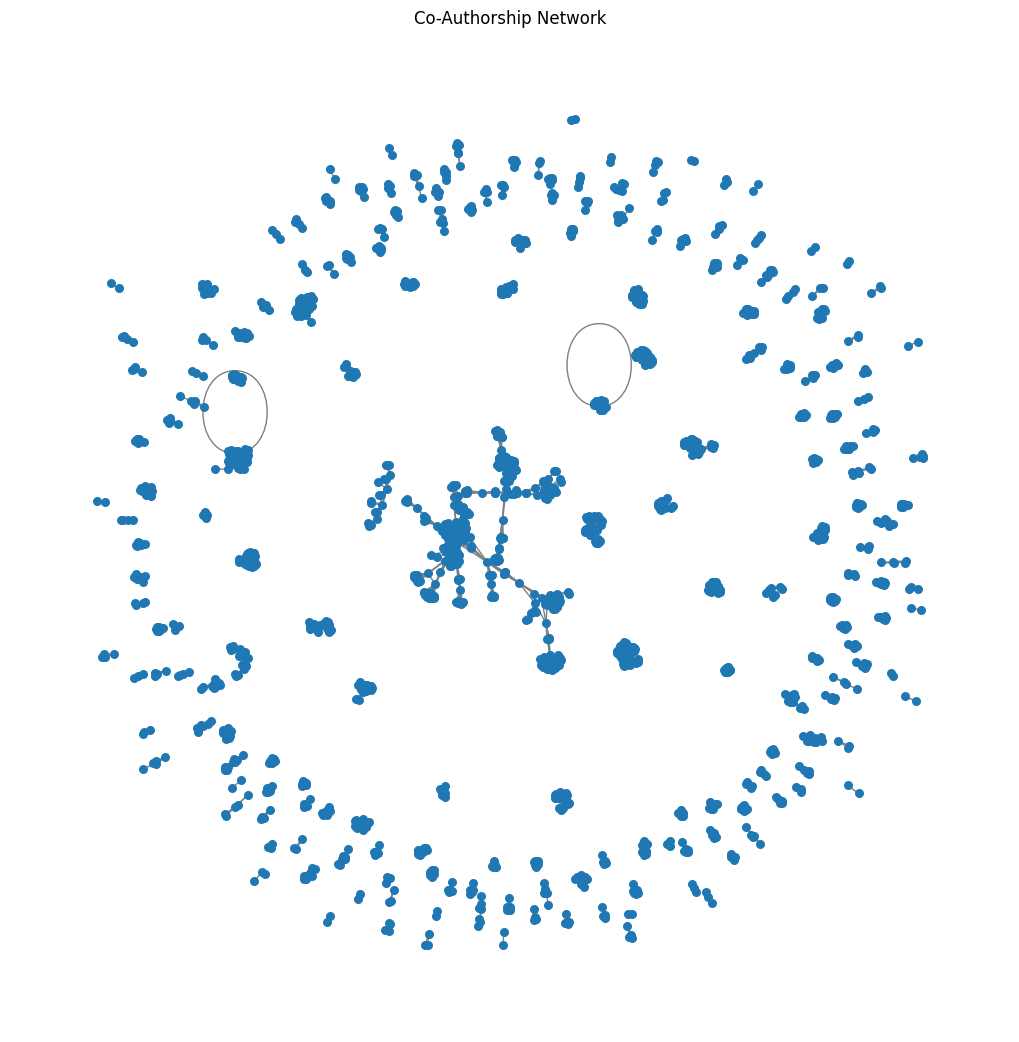

Co-authorship network saved to vosviewer_co_authorship.txt

Analyzing keywords...
Frequent keywords saved to frequent_keywords.csv


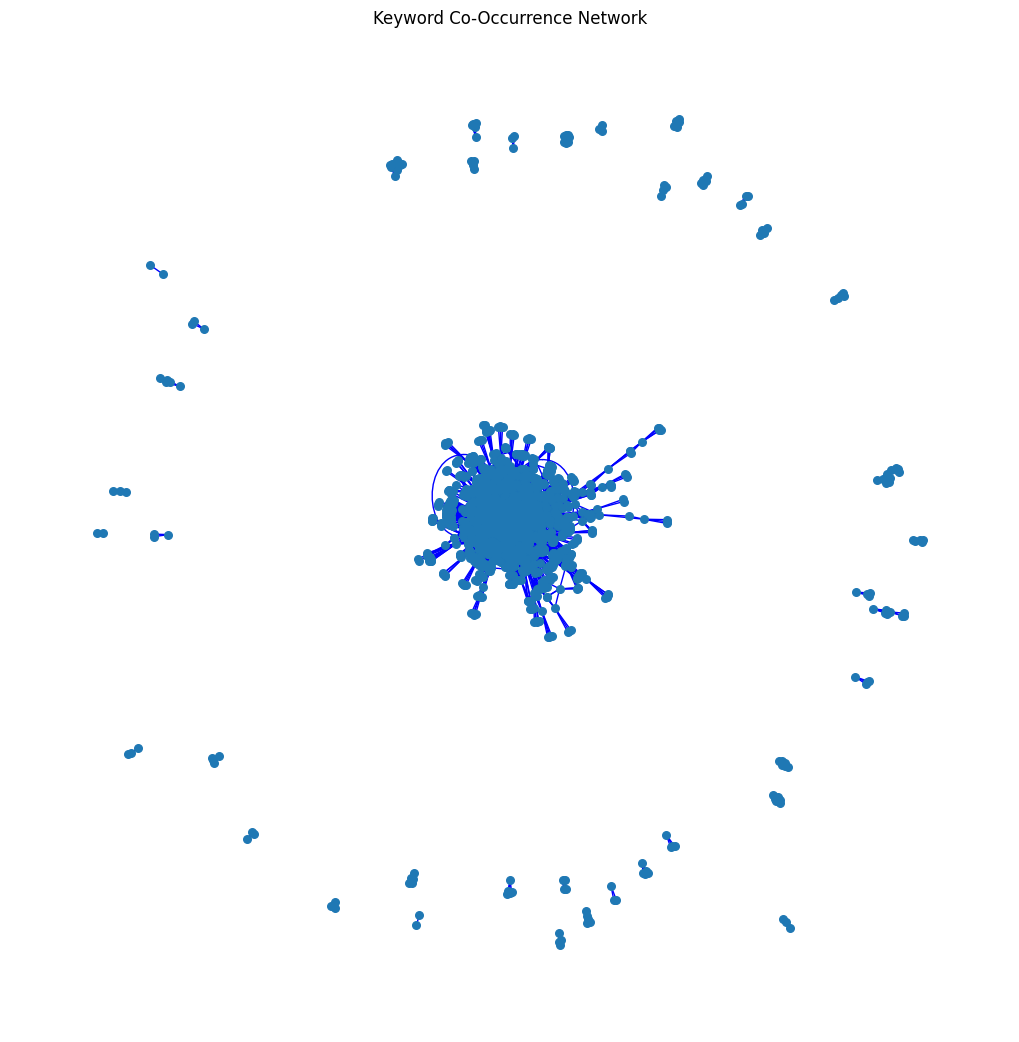

Keyword co-occurrence network saved to vosviewer_keywords.txt

Analyzing citations...
Citation metrics saved to citation_metrics.csv
Citation distribution saved to citation_distribution.png

Analyzing temporal trends...
Publications over time saved to publications_over_time.csv
Citations over time saved to citations_over_time.csv
Temporal trends plot saved to temporal_trends.png
Keyword trends over time saved to keyword_trends_over_time.csv

Creating enhanced visualizations and summary...
Summary table saved to summary_table.csv
Keyword trends plot saved to keyword_trends.png
Enhanced co-authorship network saved to co_authorship_network.png

Analysis complete! All outputs have been saved.


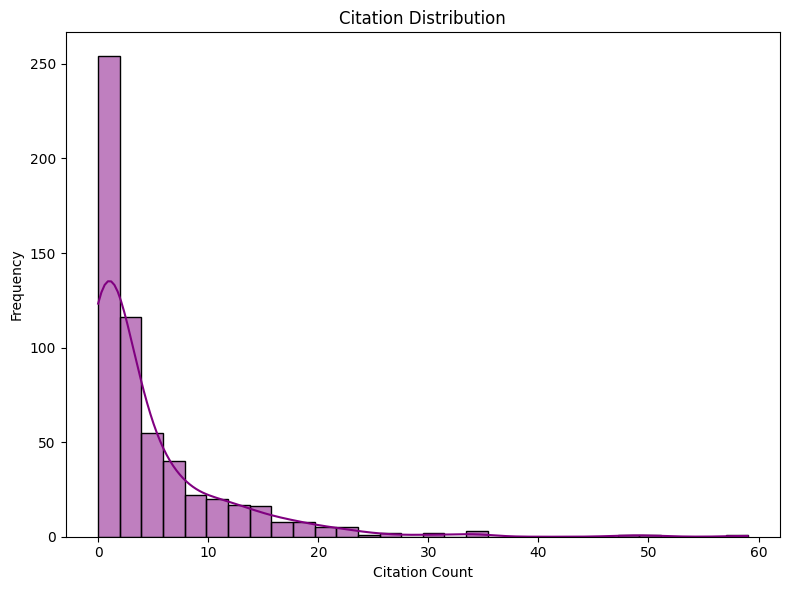

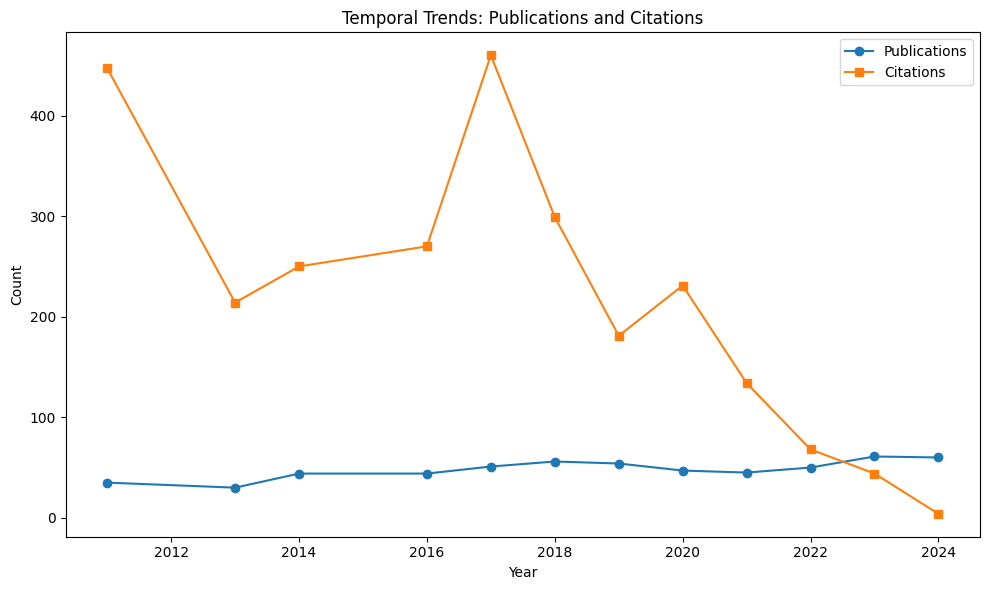

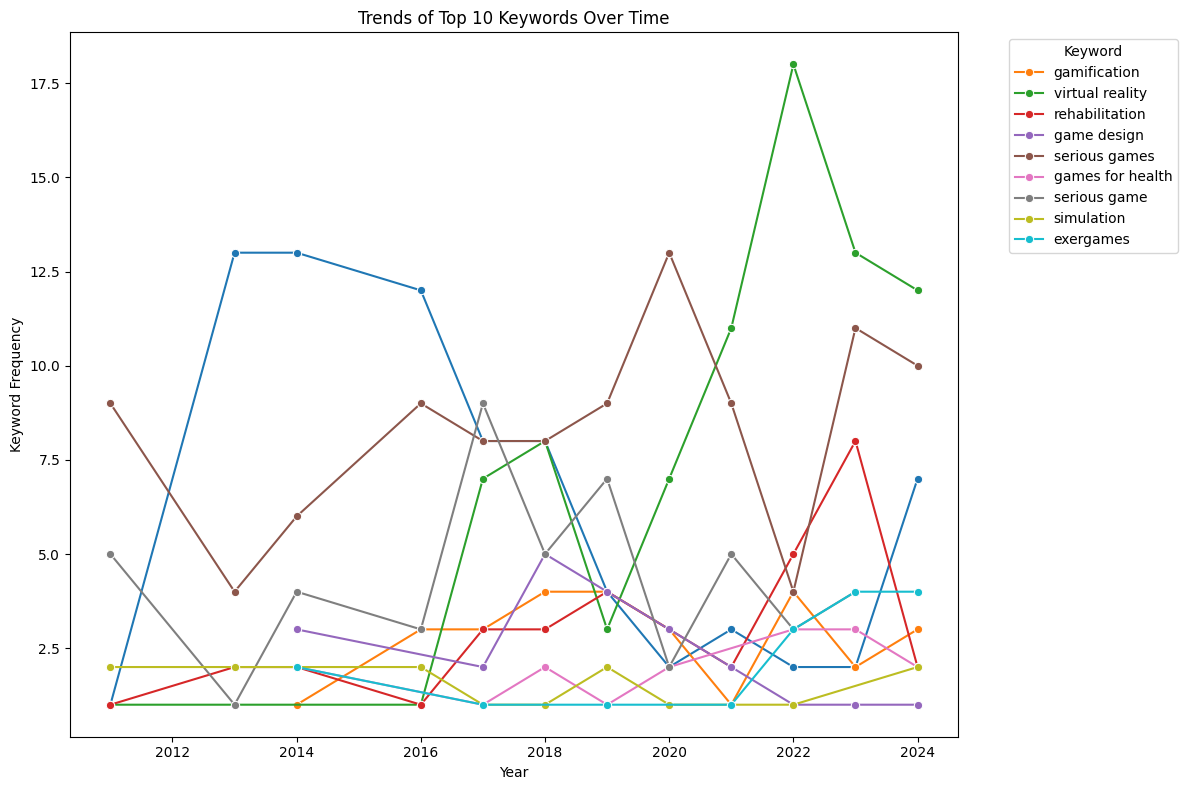

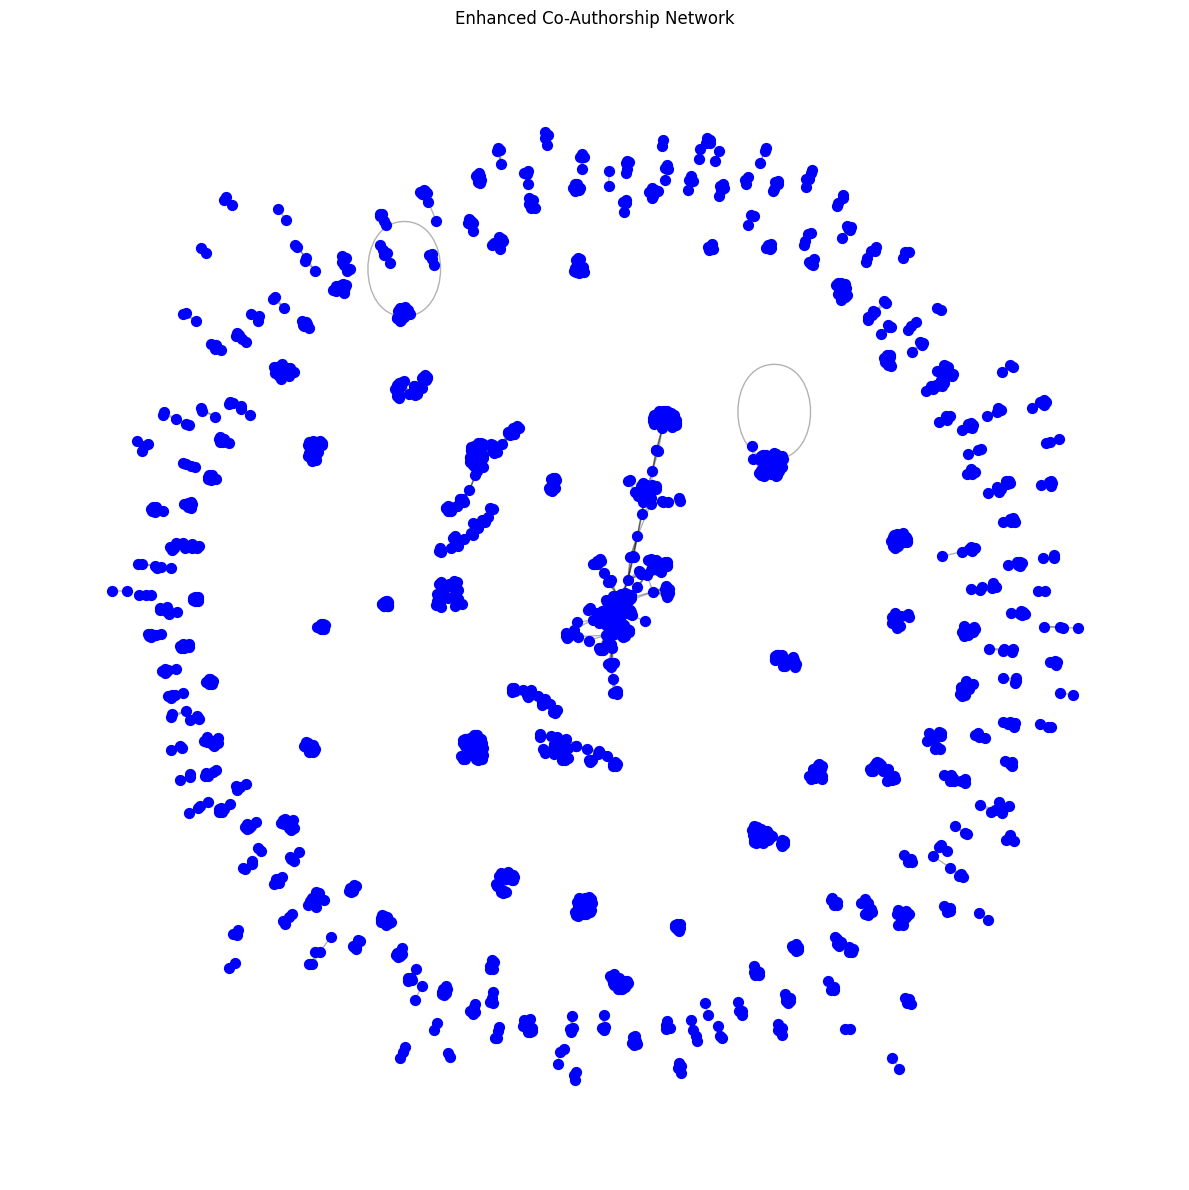

In [71]:
if __name__ == "__main__":
    # Path to the directory containing your CSV files
    directory_path = "/content/data"  # Update with your directory path

    # Step 1: Load and Clean Data
    print("Loading and cleaning data...")
    df = load_data(directory_path)
    df = standardize_columns(df)
    df = clean_missing_data(df)
    df = standardize_text_columns(df, ["authors", "author_keywords", "author_affiliations"])
    save_cleaned_data(df, "cleaned_data.csv")

    # Step 2: Descriptive Statistics
    print("\nGenerating descriptive statistics...")
    save_descriptive_statistics(df)

    # Step 3: Author Analysis
    print("\nAnalyzing authors...")
    save_prolific_authors(df)
    co_authorship_network = generate_co_authorship_network(df)
    visualize_co_authorship_network(co_authorship_network)
    save_co_authorship_vosviewer(co_authorship_network)

    # Step 4: Keyword Analysis
    print("\nAnalyzing keywords...")
    save_frequent_keywords(df)
    keyword_network = generate_keyword_co_occurrence_network(df)
    visualize_keyword_network(keyword_network)
    save_keyword_vosviewer(keyword_network)

    # Step 5: Citation Analysis
    print("\nAnalyzing citations...")
    save_citation_metrics(df)
    plot_citation_distribution(df)

    # Step 6: Temporal Analysis
    print("\nAnalyzing temporal trends...")
    publications = publications_over_time(df)
    citations = citations_over_time(df)
    plot_temporal_trends(publications, citations)
    keyword_trend_df = keyword_trends_over_time(df)

    # Step 7: Enhanced Visualizations and Summary
    print("\nCreating enhanced visualizations and summary...")
    generate_summary_table(df)
    plot_keyword_trends(keyword_trend_df)
    enhanced_co_authorship_network(co_authorship_network)

    print("\nAnalysis complete! All outputs have been saved.")